**📌 Zomato Dataset Analysis Project Structure**

🧼 1. Data Cleaning and Preprocessing

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('zomato.csv')
df.drop_duplicates(inplace=True)

df.dropna(inplace=True)
df.head(5)



,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


🍽️ Top 10 Most Popular Cuisines on Zomato

---



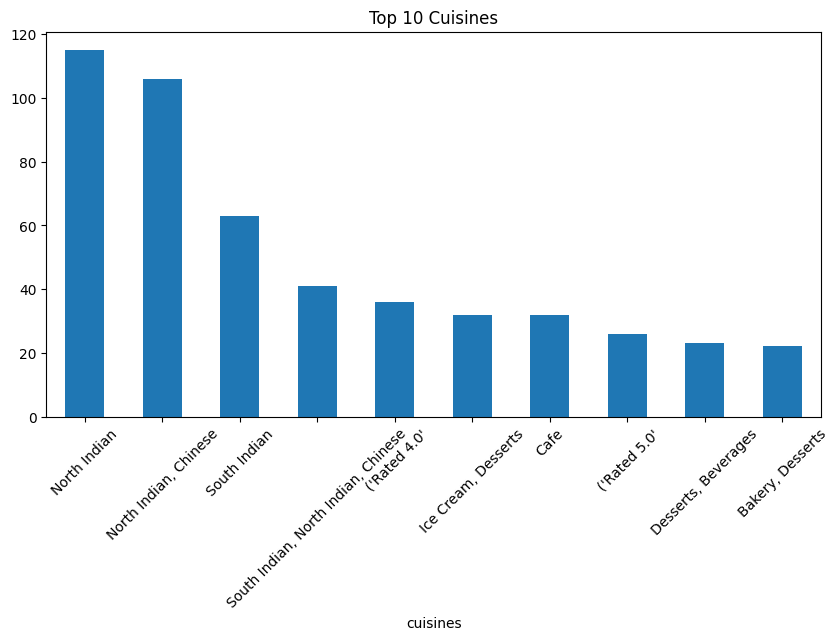

In [ ]:
plt.figure(figsize=(10,5))
df['cuisines'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cuisines')
plt.xticks(rotation=45)
plt.show()


📍 Top 10 Locations with the Most Restaurants
---

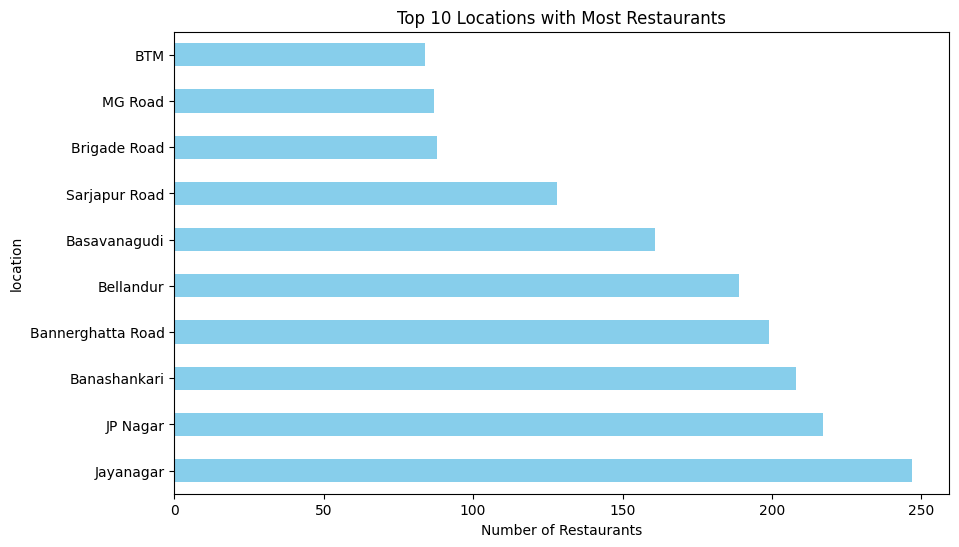

In [ ]:
plt.figure(figsize=(10,6))
df['location'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.show()


📈 Exploring Zomato Ratings 🍴 — How Do Restaurants Score? ⭐

---



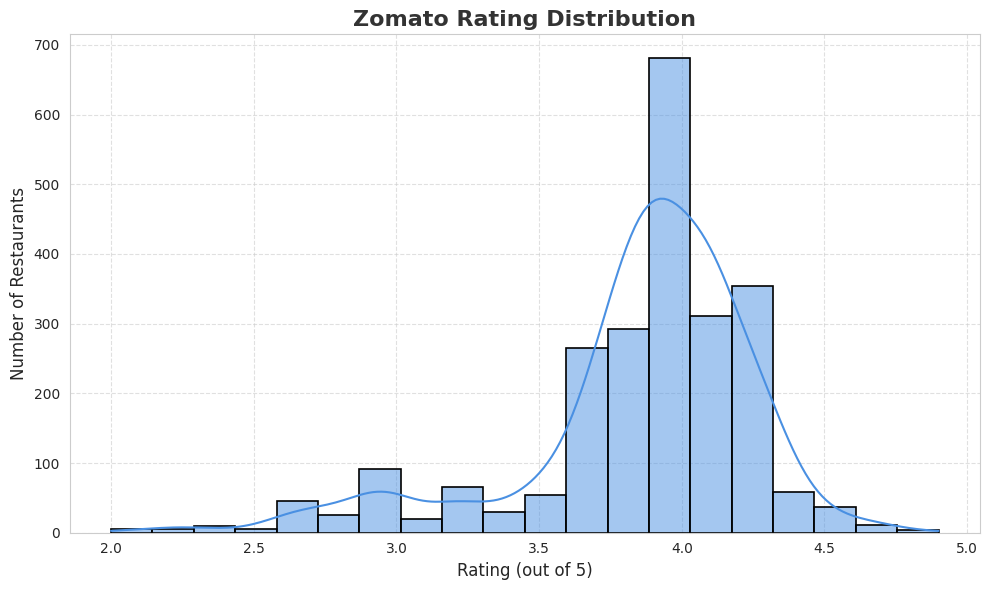

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)



# Step 2: Clean 'rate' column

df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = df['rate'].str.strip()

# Step 2: Keep only rows that are valid numbers
df = df[df['rate'].str.replace('.', '', 1).str.isnumeric()]

# Step 3: Convert to float
df['rate'] = df['rate'].astype(float)


# Step 3: Clean 'approx_costfor_two_people'
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].astype(str)
df['approx_costfor_two_people'] = df['approx_costfor_two_people'].str.replace(',', '')
df['approx_costfor_two_people'] = pd.to_numeric(df['approx_costfor_two_people'], errors='coerce')


df = df.dropna(subset=['rate', 'approx_costfor_two_people'])

# Step 4: Plot rating distribution

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")

sns.histplot(df['rate'], bins=20, kde=True, color='#4a90e2', edgecolor='black', linewidth=1.2)

plt.title('Zomato Rating Distribution', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Rating (out of 5)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



📊 Zomato Insights: Distribution of Approximate Cost for Two (₹)

---



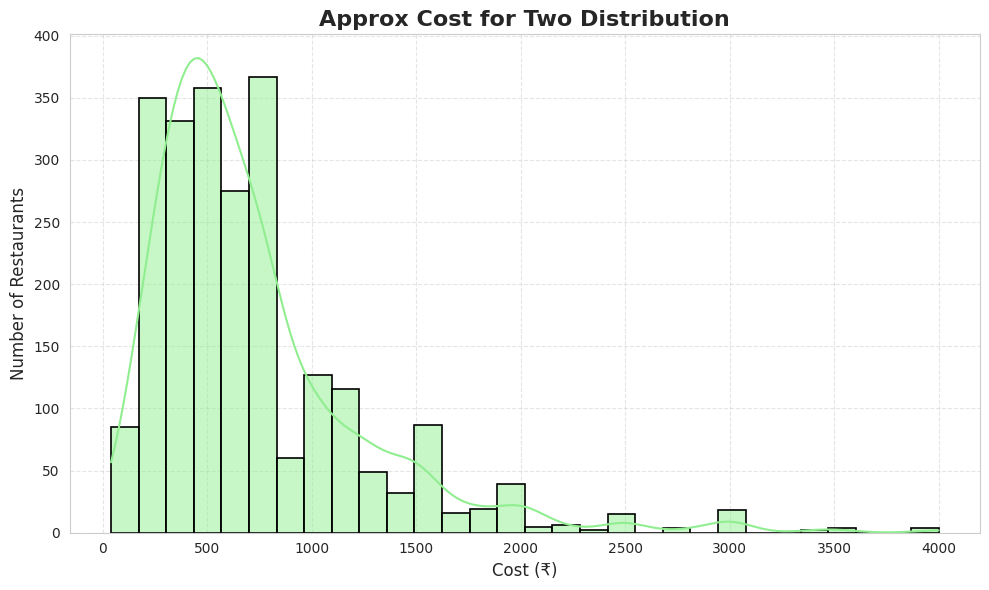

In [ ]:
# Step 5: Plot cost for two people distribution (enhanced version of your code)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(
    df['approx_costfor_two_people'],
    bins=30,
    kde=True,
    color='lightgreen',
    edgecolor='black',
    linewidth=1.2
)



plt.title('Approx Cost for Two Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Cost (₹)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🔥 Feature Correlation Heatmap 📊 | How Ratings, Cost & Votes Relate

---



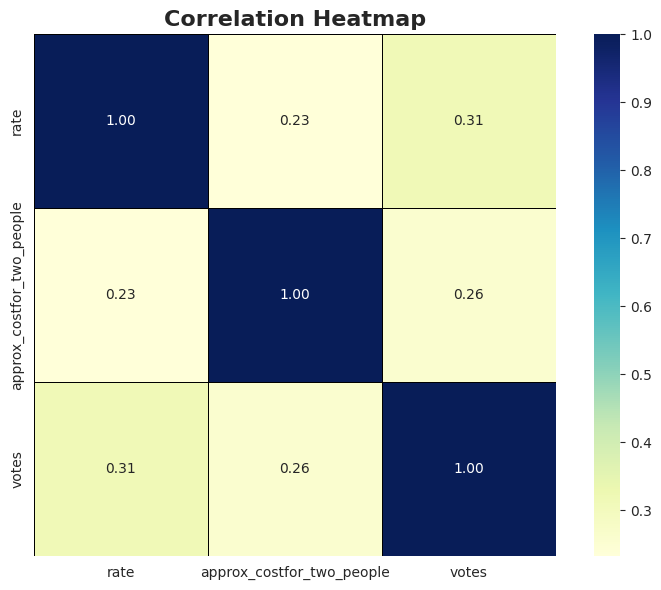

In [ ]:
# Select numerical columns for correlation
numeric_cols = df[['rate', 'approx_costfor_two_people', 'votes']]

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='black', square=True)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()